# FMSI Project Notebook

Authors:
- Benjamin Peter
- Bastien Coutadeur
- Alexandre Dias
- Mathieu Guérin

Importing our work:

In [1]:
# Generating prime numbers
from genPrime import erathosthene, is_prime
from miller_rabin import MillerRabin, generate_prime

# RSA Implementation
from rsa import RSA

# Cracking RSA
import p_1_pollard
import rho_pollard
import fermat

#Timer
import time_cracking as tm

#Plot
import matplotlib.pyplot as plt

# Helper functions
from helper import tuple_val_eq

## Prime numbers generation

### Sieve of Eratosthenes

In [30]:
print("Generating prime numbers between 2 and 1024...")
L = erathosthene(1024)
print(L)

print()  # Newline
not_primes = []
for p in L:
    if not is_prime(p):
        not_primes.append(p)
if not not_primes:
    print("Success: All the numbers are prime numbers!")
else:
    print("Error: Found non-prime numbers:", not_primes)

Generating prime numbers between 2 and 1024...
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997, 1009, 1013, 1019, 1021]

Success: All the numbers are prime numbers!


In [31]:
print("Generating prime numbers between 2 and 1048576...")
L = erathosthene(1048576)

not_primes = []
for p in L:
    if not is_prime(p):
        not_primes.append(p)
if not not_primes:
    print("Success: All the numbers are prime numbers!")
else:
    print("Error: Found non-prime numbers:", not_primes)

Generating prime numbers between 2 and 1048576...
Success: All the numbers are prime numbers!


### Basic primality test

We've implemented a basic primality test (`is_prime`), used above for checking that the sieve of eratosthenes works properly.

### Miller-Rabin primality test

We've implemented the Miller-Rabin primality test, faster than `is_prime`, for generating large prime numbers:

In [32]:
print("Generate random prime numbers between 2^127 and 2^128...")
print("1:", generate_prime(128))
print("2:", generate_prime(128))
print("3:", generate_prime(128))

Generate random prime numbers between 2^127 and 2^128...
1: 212659407101257677537315165326047185203
2: 329455217275556876933008068050725541447
3: 233659037363431862337099720621374144431


In [33]:
# Works for generating large prime numbers:
print("Generate random prime numbers between 2^1023 and 2^1024...")
print(generate_prime(1024))

Generate random prime numbers between 2^1023 and 2^1024...
94419281295186173518848948488404535637615727332979012770006999533981123303045213633616250862405901105159870392603765699393161187899836010197535132295173544486165968460896901823631188108024250095159664698791361469452532534745829449353083008312161057200084212442368985455135460855032715048806314030762073320511


## RSA Implementation

In [34]:
# Generate RSA public and private keys from given prime numbers
RSA.generate_keys(61, 53)

((3233, 7), (3233, 1783))

In [35]:
# Generate a RSA object from given prime numbers
r = RSA.generate(61, 53)

In [36]:
# The RSA ciphering modulus
r.n

3233

In [37]:
# The RSA public exponent
r.e

7

In [38]:
# The RSA public key
r.pub_key()

(3233, 7)

In [39]:
# The RSA private exponent
r.d

1783

In [40]:
# The RSA private key
r.priv_key()

(3233, 1783)

### Encryption

In [41]:
# Our clear message
msg = "Hello, world!"
print("Our message:", msg)

Our message: Hello, world!


In [42]:
# Encrypt a message
encrypted_msg = r.encrypt("Hello, world!")
print("Encrypted message:", encrypted_msg)

Encrypted message: [1087, 3071, 1877, 1877, 3183, 1129, 2774, 863, 3183, 1797, 1877, 2872, 2417]


Encryption is done character per character.

### Decryption

In [43]:
decrypted_msg = r.decrypt(encrypted_msg)
print("Decrypted message:", decrypted_msg)
if decrypted_msg == msg:
    print("This matches our original message!")
else:
    print("This does not match our original message..")

Decrypted message: Hello, world!
This matches our original message!


## Cracking RSA

We've implemented three cracking algorithms:
- Pollard's p-1 Algorithm
- Pollard's rho Algorithm
- Fermat's factorization Algorithm

_Note:  
In the examples below, we're using `tuple_val_eq` to check if the cracked primes match what is expected.  
This checks if `(p1, q1) == (p2, q2)` or `(p1, q1) == (q2, p2)`_ 

### Pollard's p-1 Algorithm

In [44]:
msg = "Hello, world! This is my very secret message."
print("Our message:", msg)

primes = (661, 673)
print("Encrypting using RSA, from prime numbers", primes)
r = RSA.generate(*primes)
encrypted_msg = r.encrypt(msg)
# print("Encrypted data:", encrypted_msg)

print()  # Newline
print(10 * '*', "Cracking with Fermat factorisation", 10 * '*')

print()  # Newline
cracked_primes = p_1_pollard.crack_primes(r.n)
print("Cracked primes:", cracked_primes)
print("Success!" if tuple_val_eq(cracked_primes, primes) else "Failure.")

print()  # Newline
cracked_msg = p_1_pollard.crack_msg(encrypted_msg, r.n)
print("Cracked message:", cracked_msg)
print("Success!" if cracked_msg == msg else "Failure.")

Our message: Hello, world! This is my very secret message.
Encrypting using RSA, from prime numbers (661, 673)

********** Cracking with Fermat factorisation **********

Cracked primes: (673, 661)
Success!

Cracked message: Hello, world! This is my very secret message.
Success!


### Pollard's rho Algorithm

In [45]:
msg = "Hello, world! This is my very secret message."
print("Our message:", msg)

primes = (661, 673)
print("Encrypting using RSA, from prime numbers", primes)
r = RSA.generate(*primes)
encrypted_msg = r.encrypt(msg)
# print("Encrypted data:", encrypted_msg)

print()  # Newline
print(10 * '*', "Cracking with Fermat factorisation", 10 * '*')

print()  # Newline
cracked_primes = rho_pollard.crack_primes(r.n)
print("Cracked primes:", cracked_primes)
print("Success!" if tuple_val_eq(cracked_primes, primes) else "Failure.")

print()  # Newline
cracked_msg = rho_pollard.crack_msg(encrypted_msg, r.n)
print("Cracked message:", cracked_msg)
print("Success!" if cracked_msg == msg else "Failure.")

Our message: Hello, world! This is my very secret message.
Encrypting using RSA, from prime numbers (661, 673)

********** Cracking with Fermat factorisation **********

Cracked primes: (673, 661)
Success!

Cracked message: Hello, world! This is my very secret message.
Success!


### Fermat's factorization Algorithm

In [46]:
msg = "Hello, world! This is my very secret message."
print("Our message:", msg)

primes = (661, 673)
print("Encrypting using RSA, from prime numbers", primes)
r = RSA.generate(*primes)
encrypted_msg = r.encrypt(msg)
# print("Encrypted data:", encrypted_msg)

print()  # Newline
print(10 * '*', "Cracking with Fermat factorisation", 10 * '*')

print()  # Newline
cracked_primes = fermat.crack_primes(r.n)
print("Cracked primes:", cracked_primes)
print("Success!" if tuple_val_eq(cracked_primes, primes) else "Failure.")

print()  # Newline
cracked_msg = fermat.crack_msg(encrypted_msg, r.n)
print("Cracked message:", cracked_msg)
print("Success!" if cracked_msg == msg else "Failure.")

Our message: Hello, world! This is my very secret message.
Encrypting using RSA, from prime numbers (661, 673)

********** Cracking with Fermat factorisation **********

Cracked primes: (661, 673)
Success!

Cracked message: Hello, world! This is my very secret message.
Success!


### Time Comparaison for different Algorithm

Rho pollard:

In [1]:
#1000 represent the maximum prime thar will be generated
time_array_rho, prime_array_rho = tm.time_crack(rho_pollard.crack_primes,1000)

NameError: name 'tm' is not defined

In [ ]:
plt.plot(prime_array_rho, time_array_rho,'o')

In [3]:
time_array_fermat, prime_array_fermat = tm.time_crack(fermat.crack_primes,10000)

Couldn't crack p = 2 q = 3
p = 17 q = 19 --- 0.0001 seconds ---
p = 41 q = 43 --- 0.0001 seconds ---
p = 67 q = 71 --- 0.0003 seconds ---
p = 97 q = 101 --- 0.0005 seconds ---
p = 127 q = 131 --- 0.0026 seconds ---
p = 157 q = 163 --- 0.0016 seconds ---
p = 191 q = 193 --- 0.0014 seconds ---
p = 227 q = 229 --- 0.0044 seconds ---
p = 257 q = 263 --- 0.0064 seconds ---
p = 283 q = 293 --- 0.0023 seconds ---
p = 331 q = 337 --- 0.0049 seconds ---
p = 367 q = 373 --- 0.0153 seconds ---
p = 401 q = 409 --- 0.0087 seconds ---
p = 439 q = 443 --- 0.0235 seconds ---
p = 467 q = 479 --- 0.0206 seconds ---
p = 509 q = 521 --- 0.0197 seconds ---
p = 563 q = 569 --- 0.026 seconds ---
p = 599 q = 601 --- 0.0361 seconds ---
p = 631 q = 641 --- 0.0443 seconds ---
p = 661 q = 673 --- 0.0041 seconds ---
p = 709 q = 719 --- 0.0186 seconds ---
p = 751 q = 757 --- 0.0142 seconds ---
p = 797 q = 809 --- 0.0569 seconds ---
p = 829 q = 839 --- 0.0176 seconds ---
p = 877 q = 881 --- 0.0494 seconds ---
p = 91

p = 9883 q = 9887 --- 4.9216 seconds ---
p = 9931 q = 9941 --- 12.2592 seconds ---
Sucess rate: 204/1
[0.0001, 0.0001, 0.0003, 0.0005, 0.0026, 0.0016, 0.0014, 0.0044, 0.0064, 0.0023, 0.0049, 0.0153, 0.0087, 0.0235, 0.0206, 0.0197, 0.026, 0.0361, 0.0443, 0.0041, 0.0186, 0.0142, 0.0569, 0.0176, 0.0494, 0.0195, 0.0307, 0.1008, 0.0241, 0.0829, 0.0675, 0.1231, 0.1243, 0.1326, 0.1222, 0.0289, 0.1948, 0.2103, 0.1403, 0.1533, 0.0766, 0.195, 0.2622, 0.2925, 0.246, 0.2267, 0.3901, 0.0922, 0.4052, 0.2021, 0.3081, 0.1738, 0.4913, 0.2843, 0.1514, 0.4397, 0.3021, 0.4026, 0.5863, 0.5812, 0.272, 0.2602, 0.4796, 0.7493, 0.6525, 0.1558, 0.7809, 0.7451, 0.3755, 0.5593, 0.6638, 0.9685, 0.6602, 0.3152, 0.6755, 0.5496, 0.3689, 1.3034, 1.2079, 1.1335, 0.8055, 1.4236, 0.6119, 0.6249, 1.2016, 0.2651, 1.1034, 1.1959, 0.3852, 1.3006, 0.7028, 1.2101, 1.092, 0.6161, 0.8442, 1.2944, 1.5889, 1.3933, 1.0849, 1.9544, 1.5792, 1.5, 0.9875, 1.512, 0.532, 2.103, 1.6648, 1.5475, 2.1935, 2.4966, 1.1803, 0.8501, 2.2316, 1.89

Sucess rate: 204/1  
Pre calculated values for up to 10000

In [4]:
time_array_fermat = [0.0001, 0.0001, 0.0003, 0.0005, 0.0026, 0.0016, 0.0014, 0.0044, 0.0064, 0.0023, 0.0049, 0.0153, 0.0087, 0.0235, 0.0206, 0.0197, 0.026, 0.0361, 0.0443, 0.0041, 0.0186, 0.0142, 0.0569, 0.0176, 0.0494, 0.0195, 0.0307, 0.1008, 0.0241, 0.0829, 0.0675, 0.1231, 0.1243, 0.1326, 0.1222, 0.0289, 0.1948, 0.2103, 0.1403, 0.1533, 0.0766, 0.195, 0.2622, 0.2925, 0.246, 0.2267, 0.3901, 0.0922, 0.4052, 0.2021, 0.3081, 0.1738, 0.4913, 0.2843, 0.1514, 0.4397, 0.3021, 0.4026, 0.5863, 0.5812, 0.272, 0.2602, 0.4796, 0.7493, 0.6525, 0.1558, 0.7809, 0.7451, 0.3755, 0.5593, 0.6638, 0.9685, 0.6602, 0.3152, 0.6755, 0.5496, 0.3689, 1.3034, 1.2079, 1.1335, 0.8055, 1.4236, 0.6119, 0.6249, 1.2016, 0.2651, 1.1034, 1.1959, 0.3852, 1.3006, 0.7028, 1.2101, 1.092, 0.6161, 0.8442, 1.2944, 1.5889, 1.3933, 1.0849, 1.9544, 1.5792, 1.5, 0.9875, 1.512, 0.532, 2.103, 1.6648, 1.5475, 2.1935, 2.4966, 1.1803, 0.8501, 2.2316, 1.8999, 1.891, 2.3179, 2.299, 2.3072, 2.3217, 0.5385, 1.4273, 1.4879, 3.3262, 2.344, 1.093, 0.7986, 0.5988, 0.6375, 1.9435, 3.0267, 1.8067, 0.9051, 3.4219, 2.9328, 2.9134, 3.9913, 3.55, 3.4075, 3.4015, 3.0534, 1.257, 3.5046, 1.8387, 4.4902, 4.716, 2.3644, 3.7381, 4.0524, 3.5921, 4.2716, 3.9497, 3.9007, 2.5626, 2.4736, 3.8604, 1.8125, 4.7324, 1.5268, 5.6682, 2.9581, 3.2966, 0.6926, 3.0761, 1.4874, 5.0568, 5.1483, 5.208, 3.5258, 5.5522, 5.6685, 2.9445, 3.552, 2.3554, 6.8711, 1.6889, 3.7798, 8.75, 7.2993, 7.5098, 5.1172, 2.7103, 8.134, 7.6038, 3.7508, 7.2771, 8.5252, 8.5519, 8.1985, 0.9747, 6.9, 8.3217, 8.8035, 7.2466, 9.8034, 10.3513, 5.3129, 7.7111, 9.4676, 2.3101, 9.4102, 8.4091, 8.2935, 4.9216, 12.2592]
prime_array_fermat = [323, 1763, 4757, 9797, 16637, 25591, 36863, 51983, 67591, 82919, 111547, 136891, 164009, 194477, 223693, 265189, 320347, 359999, 404471, 444853, 509771, 568507, 644773, 695531, 772637, 853751, 938957, 1022117, 1089911, 1185917, 1254391, 1382951, 1488391, 1607743, 1687397, 1806047, 2005007, 2099597, 2205221, 2331713, 2461757, 2585663, 2712509, 2883203, 3041527, 3196943, 3437267, 3549431, 3767417, 3980021, 4112783, 4334723, 4498577, 4652633, 4968377, 5157437, 5336099, 5541307, 5716877, 5948717, 6199931, 6502499, 6827753, 7080917, 7241477, 7420151, 7683959, 7901657, 8173877, 8485553, 8797147, 9126437, 9443293, 9790577, 10169717, 10497479, 10889999, 11088899, 11370383, 11840417, 12110279, 12467957, 12709189, 13068221, 13432189, 13727009, 14167687, 14531263, 14884139, 15319387, 15563021, 16080091, 16434907, 16850989, 17264021, 17791523, 18113527, 18429833, 19009591, 19554083, 19998703, 20412323, 20930561, 21511043, 21790199, 22335067, 22924943, 23270927, 24068827, 24472793, 24900091, 25220483, 25847047, 26347493, 26967233, 27551857, 28153627, 28987447, 29354723, 29811479, 30305021, 30913591, 31708097, 32012963, 32558411, 33223471, 33837473, 34269307, 34680257, 35604893, 36481591, 37015031, 37601423, 38415203, 38912563, 39463499, 40018267, 40500487, 41267767, 42068171, 43007339, 43599593, 44448853, 44970427, 45846377, 46580621, 47141947, 47803387, 48566957, 49098013, 49885933, 50808383, 51839951, 52417591, 53406863, 54169519, 55562107, 56160011, 56836517, 57380621, 57972947, 58936313, 59598391, 60434851, 61575373, 62283583, 63091213, 64224187, 65351047, 65934391, 66994189, 67815221, 68707517, 69572137, 70626991, 71470067, 72794999, 73770857, 74563189, 75429209, 76125589, 76912819, 77898251, 78588221, 79869953, 80999999, 81757763, 82919227, 83887277, 84750427, 85877189, 86881037, 87871867, 88736399, 89529443, 90325967, 91565437, 92736899, 93779831, 94887077, 95824517, 96746887, 97713221, 98724071]


In [ ]:
plt.plot(prime_array_fermat, time_array_fermat,'o')

P-1 pollard:

In [2]:
time_array_p_1, prime_array_p_1 = tm.time_crack(p_1_pollard.crack_primes,10000)

p = 3 q = 2 --- 0.0 seconds ---
p = 17 q = 19 --- 0.0001 seconds ---
p = 41 q = 43 --- 0.0001 seconds ---
p = 71 q = 67 --- 0.0003 seconds ---
p = 97 q = 101 --- 0.0003 seconds ---
p = 127 q = 131 --- 0.002 seconds ---
p = 163 q = 157 --- 0.0019 seconds ---
p = 193 q = 191 --- 0.0016 seconds ---
p = 229 q = 227 --- 0.0046 seconds ---
p = 257 q = 263 --- 0.0072 seconds ---
p = 283 q = 293 --- 0.005 seconds ---
p = 331 q = 337 --- 0.0053 seconds ---
p = 373 q = 367 --- 0.0144 seconds ---
p = 401 q = 409 --- 0.0109 seconds ---
p = 443 q = 439 --- 0.0171 seconds ---
p = 467 q = 479 --- 0.0541 seconds ---
p = 521 q = 509 --- 0.0183 seconds ---
p = 569 q = 563 --- 0.0255 seconds ---
p = 601 q = 599 --- 0.037 seconds ---
p = 631 q = 641 --- 0.0454 seconds ---
p = 673 q = 661 --- 0.0045 seconds ---
p = 709 q = 719 --- 0.0133 seconds ---
p = 757 q = 751 --- 0.0113 seconds ---
p = 809 q = 797 --- 0.0588 seconds ---
p = 829 q = 839 --- 0.0243 seconds ---
p = 881 q = 877 --- 0.0584 seconds ---
p =

p = 9883 q = 9887 --- 5.4559 seconds ---
p = 9941 q = 9931 --- 12.1245 seconds ---
Sucess rate: 204/1
[0.0, 0.0001, 0.0001, 0.0003, 0.0003, 0.002, 0.0019, 0.0016, 0.0046, 0.0072, 0.005, 0.0053, 0.0144, 0.0109, 0.0171, 0.0541, 0.0183, 0.0255, 0.037, 0.0454, 0.0045, 0.0133, 0.0113, 0.0588, 0.0243, 0.0584, 0.021, 0.034, 0.0951, 0.0446, 0.0951, 0.0576, 0.1095, 0.1182, 0.1576, 0.134, 0.1823, 0.1921, 0.1415, 0.1626, 0.0801, 0.2095, 0.281, 0.2093, 0.2318, 0.3549, 0.3266, 0.087, 0.4357, 0.2272, 0.3207, 0.1417, 0.467, 0.3688, 0.1994, 0.4994, 0.3407, 0.4379, 0.5269, 0.6485, 0.3285, 0.2821, 0.5315, 0.7108, 0.8379, 0.1919, 0.8199, 0.9006, 0.3154, 0.6876, 0.7778, 1.2373, 0.8053, 0.3737, 0.8271, 0.8183, 0.6564, 1.2104, 1.3017, 1.2963, 1.1832, 1.259, 0.7239, 0.6696, 1.1632, 0.2398, 1.2053, 1.3875, 0.4172, 1.4002, 0.8907, 1.3152, 1.3812, 0.577, 0.892, 1.4087, 2.6808, 1.4096, 0.924, 2.1559, 1.97, 1.5635, 1.2707, 1.7319, 0.7735, 2.4481, 1.7858, 1.6227, 2.6543, 2.9991, 1.3164, 0.9631, 2.2616, 1.9545, 2.2

Pre calculated values for up to 10000

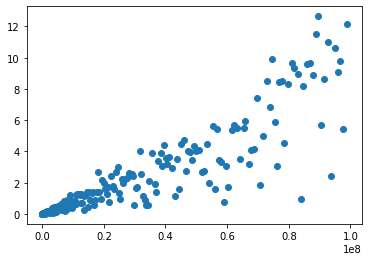

In [6]:
plt.plot(prime_array_p_1, time_array_p_1,'o')

In [ ]:
time_array_p_1 = [0.0, 0.0001, 0.0001, 0.0003, 0.0003, 0.002, 0.0019, 0.0016, 0.0046, 0.0072, 0.005, 0.0053, 0.0144, 0.0109, 0.0171, 0.0541, 0.0183, 0.0255, 0.037, 0.0454, 0.0045, 0.0133, 0.0113, 0.0588, 0.0243, 0.0584, 0.021, 0.034, 0.0951, 0.0446, 0.0951, 0.0576, 0.1095, 0.1182, 0.1576, 0.134, 0.1823, 0.1921, 0.1415, 0.1626, 0.0801, 0.2095, 0.281, 0.2093, 0.2318, 0.3549, 0.3266, 0.087, 0.4357, 0.2272, 0.3207, 0.1417, 0.467, 0.3688, 0.1994, 0.4994, 0.3407, 0.4379, 0.5269, 0.6485, 0.3285, 0.2821, 0.5315, 0.7108, 0.8379, 0.1919, 0.8199, 0.9006, 0.3154, 0.6876, 0.7778, 1.2373, 0.8053, 0.3737, 0.8271, 0.8183, 0.6564, 1.2104, 1.3017, 1.2963, 1.1832, 1.259, 0.7239, 0.6696, 1.1632, 0.2398, 1.2053, 1.3875, 0.4172, 1.4002, 0.8907, 1.3152, 1.3812, 0.577, 0.892, 1.4087, 2.6808, 1.4096, 0.924, 2.1559, 1.97, 1.5635, 1.2707, 1.7319, 0.7735, 2.4481, 1.7858, 1.6227, 2.6543, 2.9991, 1.3164, 0.9631, 2.2616, 1.9545, 2.2084, 2.3113, 2.6392, 2.5502, 2.4239, 0.602, 1.6834, 1.7443, 4.0155, 2.5827, 1.1642, 0.896, 0.5716, 0.5781, 2.1127, 3.8943, 1.9005, 1.4171, 3.4037, 3.8823, 3.0669, 4.4261, 3.6036, 3.1638, 3.6444, 2.9615, 1.12, 3.4972, 1.6108, 4.4809, 4.7448, 2.7512, 4.0245, 3.9428, 3.4408, 4.3342, 4.0228, 4.0749, 2.7078, 2.7202, 4.4515, 1.9519, 5.6055, 1.5651, 5.4449, 3.4822, 3.3174, 0.7313, 3.065, 1.7151, 5.3468, 5.7065, 5.5176, 3.5401, 5.4838, 5.9387, 3.1999, 4.0808, 4.1737, 7.4243, 1.8565, 4.9708, 8.4855, 6.8496, 9.9372, 5.8576, 3.0353, 8.4402, 8.5004, 4.5633, 8.3461, 9.6529, 9.353, 8.9358, 0.9723, 8.1987, 9.5935, 9.6645, 8.8883, 11.5081, 12.6517, 5.6759, 8.6167, 11.0262, 2.4345, 10.6413, 9.1108, 9.8131, 5.4559, 12.1245]
[6, 323, 1763, 4757, 9797, 16637, 25591, 36863, 51983, 67591, 82919, 111547, 136891, 164009, 194477, 223693, 265189, 320347, 359999, 404471, 444853, 509771, 568507, 644773, 695531, 772637, 853751, 938957, 1022117, 1089911, 1185917, 1254391, 1382951, 1488391, 1607743, 1687397, 2005007, 2099597, 2205221, 2331713, 2461757, 2585663, 2712509, 2883203, 3041527, 3196943, 3437267, 3549431, 3767417, 3980021, 4112783, 4334723, 4498577, 4652633, 4968377, 5157437, 5336099, 5541307, 5716877, 5948717, 6199931, 6502499, 6827753, 7080917, 7241477, 7420151, 7683959, 7901657, 8173877, 8485553, 8797147, 9126437, 9443293, 9790577, 10169717, 10497479, 10889999, 11088899, 11370383, 11840417, 12110279, 12467957, 12709189, 13068221, 13432189, 13727009, 14167687, 14531263, 14884139, 15319387, 15563021, 16080091, 16434907, 16850989, 17264021, 17791523, 18113527, 18429833, 19009591, 19554083, 19998703, 20412323, 20930561, 21511043, 21790199, 22335067, 22924943, 23270927, 24068827, 24472793, 24900091, 25220483, 25847047, 26347493, 26967233, 27551857, 28153627, 28987447, 29354723, 29811479, 30305021, 30913591, 31708097, 32012963, 32558411, 33223471, 33837473, 34269307, 34680257, 35604893, 36481591, 37015031, 37601423, 38415203, 38912563, 39463499, 40018267, 40500487, 41267767, 42068171, 43007339, 43599593, 44448853, 44970427, 45846377, 46580621, 47141947, 47803387, 48566957, 49098013, 49885933, 50808383, 51839951, 52417591, 53406863, 54169519, 55562107, 56160011, 56836517, 57380621, 57972947, 58936313, 59598391, 60434851, 61575373, 62283583, 63091213, 64224187, 65351047, 65934391, 66994189, 67815221, 68707517, 69572137, 70626991, 71470067, 72794999, 73770857, 74563189, 75429209, 76125589, 76912819, 77898251, 78588221, 79869953, 80999999, 81757763, 82919227, 83887277, 84750427, 85877189, 86881037, 87871867, 88736399, 89529443, 90325967, 91565437, 92736899, 93779831, 94887077, 95824517, 96746887, 97713221, 98724071]